# Project: Intrusion Detection System Using Machine Learning
## Project Overview:
In this project, you will work on a dataset commonly used for network intrusion detection.
The dataset contains network traffic data, including both normal and attack behaviors. Your
objective is to build and evaluate a machine learning model that can classify different types
of network activities as several types (multi-class classification). This project will test
your ability to choose appropriate algorithms, preprocess data, and evaluate model
performance.


## 1 - Data Preprocessing

### 1. Loading and Generating the Dataset

 **1.1 Upload Dataset_project_RS.csv to Colab
Upload the Dataset_project_RS.csv file to the Google Colab environment.**

**1.2 Use the data_generator.py Script
Since we're working in Colab, you can adapt the data_generator.py script directly in our notebook.**

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Set the seed value for reproducibility
np.random.seed(111)

# Define the data generator function inspired by data_generator.py
def data_generator(data):
    """
    This function generates a dataset by randomly dropping columns and sampling rows.

    @param data: Original dataset with features and target 'outcome'
    @return: Randomly modified dataset with fewer columns and a subset of rows
    """
    print("Original data shape:", data.shape)

    # Separate target and features
    y = data['outcome']
    X = data.drop(['outcome'], axis=1)
    print("Shape after separating 'outcome':", X.shape)

    # Randomly drop 10 columns
    indexes_cols_drop = np.random.randint(len(X.columns), size=10)
    columns = list(X.columns)
    X = X.drop([columns[i] for i in range(len(columns)) if i in indexes_cols_drop], axis=1)
    print("Shape after dropping random columns:", X.shape)

    # Randomly sample rows
    nb_rows = np.random.randint(7000, len(X))  # Ensure at least 7000 rows are selected
    indexes_rows = np.random.randint(len(X), size=nb_rows)
    print(f"Number of rows selected: {nb_rows}")

    # Combine features and target
    data_for_project = pd.concat([X, y], axis=1)
    data_for_project = data_for_project.loc[indexes_rows, :]
    print("Final shape of generated data:", data_for_project.shape)

    return data_for_project

# Load the dataset
data = pd.read_csv("Dataset_project_RS.csv")

# Generate the data using the defined function
data_for_project = data_generator(data)

# Check the generated data
print("Generated dataset shape:", data_for_project.shape)
print("First few rows of the generated dataset:\n", data_for_project.head())

# Save the generated dataset to avoid regenerating it each time
data_for_project.to_csv('datasetGenerated.csv', index=False)


Original data shape: (125973, 44)
Shape after separating 'outcome': (125973, 43)
Shape after dropping random columns: (125973, 35)
Number of rows selected: 81681
Final shape of generated data: (81681, 36)
Generated dataset shape: (81681, 36)
First few rows of the generated dataset:
         Unnamed: 0  duration   service flag  src_bytes  dst_bytes  \
119815      119815         0    telnet   S0          0          0   
120076      120076         0      http   SF        297      29678   
77066        77066         0      http   SF        293        655   
17857        17857         0   private   S0          0          0   
100208      100208         0  ftp_data   SF        383          0   

        wrong_fragment  urgent  hot  num_failed_logins  ...  dst_host_count  \
119815               0       0    0                  0  ...             255   
120076               0       0    0                  0  ...              68   
77066                0       0    0                  0  ...     

**1.3 Verify the Generated Dataset
Check the shape and columns of your generated dataset.**

In [2]:
print("Dataset shape:", data_for_project.shape)
print("Dataset columns:", data_for_project.columns)

Dataset shape: (81681, 36)
Dataset columns: Index(['Unnamed: 0', 'duration', 'service', 'flag', 'src_bytes', 'dst_bytes',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_root',
       'num_file_creations', 'is_host_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'level', 'outcome'],
      dtype='object')


The output indicates that the generated dataset, data_for_project, has:

*   Shape: 81,681 rows and 36 columns
*   Columns: 36 feature names, including the target column, outcome.



It appears that one column, Unnamed: 0, might be an index column from the original dataset, which is typically not needed for modeling.

In [3]:
# Drop the 'Unnamed: 0' column it’s just an index column
data_for_project = data_for_project.drop(columns=['Unnamed: 0'])
print("Updated dataset shape:", data_for_project.shape)
print("Dataset columns after removing 'Unnamed: 0':", data_for_project.columns)

Updated dataset shape: (81681, 35)
Dataset columns after removing 'Unnamed: 0': Index(['duration', 'service', 'flag', 'src_bytes', 'dst_bytes',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_root',
       'num_file_creations', 'is_host_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'level', 'outcome'],
      dtype='object')


### 2. Data Preprocessing
Now that we have our dataset (data_for_project), let's proceed with data preprocessing.

**2.1 Exploratory Data Analysis (EDA)**

View Basic Information

In [4]:
data_for_project.info()
data_for_project.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 81681 entries, 119815 to 36256
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     81681 non-null  int64  
 1   service                      81681 non-null  object 
 2   flag                         81681 non-null  object 
 3   src_bytes                    81681 non-null  int64  
 4   dst_bytes                    81681 non-null  int64  
 5   wrong_fragment               81681 non-null  int64  
 6   urgent                       81681 non-null  int64  
 7   hot                          81681 non-null  int64  
 8   num_failed_logins            81681 non-null  int64  
 9   logged_in                    81681 non-null  int64  
 10  num_compromised              81681 non-null  int64  
 11  root_shell                   81681 non-null  int64  
 12  su_attempted                 81681 non-null  int64  
 13  num_root        

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,level
count,81681.000000,8.168100e+04,8.168100e+04,81681.000000,81681.000000,81681.000000,81681.000000,81681.000000,81681.000000,81681.000000,...,81681.000000,81681.000000,81681.000000,81681.000000,81681.000000,81681.000000,81681.000000,81681.000000,81681.000000,81681.000000
mean,307.297413,4.379019e+04,7.879422e+03,0.021596,0.000037,0.183653,0.001273,0.394143,0.566631,0.001334,...,0.097793,182.231143,114.793881,0.518490,0.083262,0.148866,0.032771,0.286476,0.280675,19.506752
std,2760.672440,5.727994e+06,1.402561e+06,0.246868,0.007824,2.026580,0.043120,0.488669,47.083252,0.036506,...,0.260233,99.277316,110.596806,0.448672,0.188878,0.309468,0.113623,0.445767,0.446717,2.285168
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,255.000000,61.000000,0.500000,0.030000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.750000e+02,5.020000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,21.000000
max,42908.000000,1.379964e+09,4.002911e+08,3.000000,2.000000,77.000000,4.000000,1.000000,7479.000000,1.000000,...,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


The dataset has 35 columns with 81,681 entries each, indicating no missing values.

Data types include int64, float64, and object types, meaning there are categorical columns (**service**, **flag**, and **outcome**) that likely need *encoding* for modeling.

After that we check for Missing Values

In [5]:
missing_values = data_for_project.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 duration                       0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
is_host_login                  0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_sa

The results show that there are no missing values in any column of the dataset, which is excellent for model training, as no imputation or additional data cleaning for missing values is required

**2.2 Encode Categorical Features**

In [6]:
# Define the categorical columns to be one-hot encoded
categorical_cols = ['service', 'flag']

# Apply One-Hot Encoding to these columns
data_encoded = pd.get_dummies(data_for_project, columns=categorical_cols, drop_first=True)

# Encode the 'outcome' column using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_encoded['outcome'] = label_encoder.fit_transform(data_encoded['outcome'])

# Check the first few rows after encoding
print("First few rows of encoded data:\n", data_encoded.head())

First few rows of encoded data:
         duration  src_bytes  dst_bytes  wrong_fragment  urgent  hot  \
119815         0          0          0               0       0    0   
120076         0        297      29678               0       0    0   
77066          0        293        655               0       0    0   
17857          0          0          0               0       0    0   
100208         0        383          0               0       0    0   

        num_failed_logins  logged_in  num_compromised  root_shell  ...  \
119815                  0          0                0           0  ...   
120076                  0          1                0           0  ...   
77066                   0          1                0           0  ...   
17857                   0          0                0           0  ...   
100208                  0          1                0           0  ...   

        flag_REJ  flag_RSTO  flag_RSTOS0  flag_RSTR  flag_S0  flag_S1  \
119815     False      

The encoded dataset looks good with the categorical variables now transformed into one-hot encoded features. This includes the flag_* features where each unique category is represented as a separate column (e.g., flag_REJ, flag_RSTO, etc.).

**2.3 Separate Features and Target Variable**

In [7]:
X = data_encoded.drop('outcome', axis=1)
y = data_encoded['outcome']

*   x holds all the features (inputs) for training.
*   y holds the labels (outputs) for training and evaluation.


Retrieve original values of outcome :

In [8]:
# Convert the numeric labels back to original strings
y_original_labels = label_encoder.inverse_transform(y)

Check the distribution of the target variable:

<ipython-input-9-3651048d6cb9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_original_labels, palette="viridis")


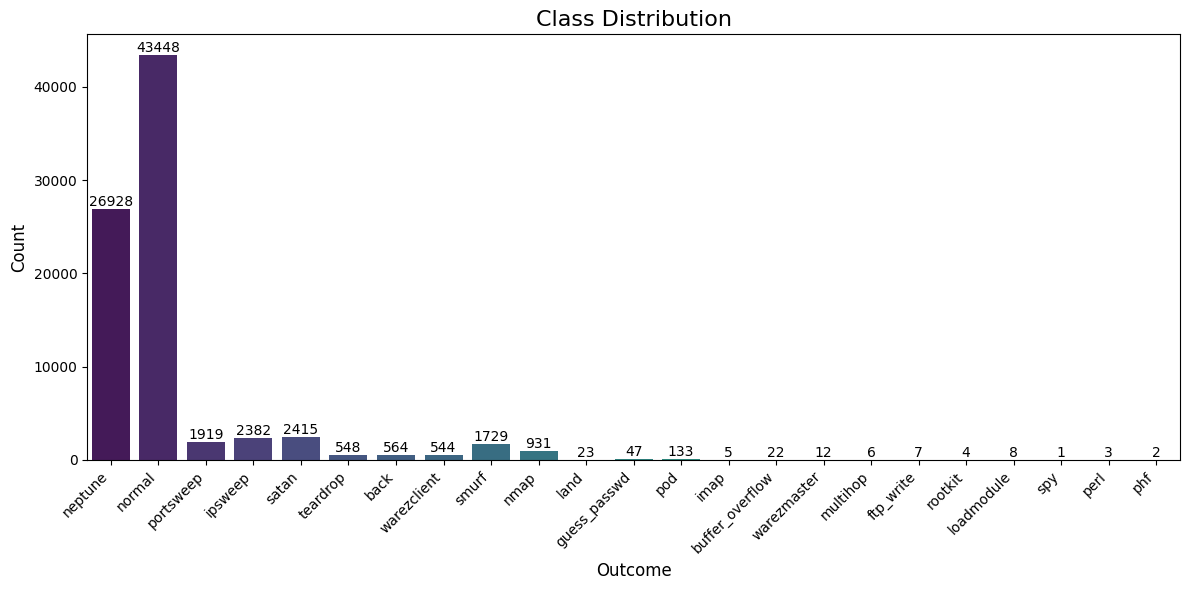

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot class distribution with original labels
plt.figure(figsize=(12, 6))
sns.countplot(x=y_original_labels, palette="viridis")

# Rotate x-axis labels, set title and axis labels
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title('Class Distribution', fontsize=16)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add count labels on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

## 2 - Feature Selection:

### 2.1. Feature Scaling
Scaling helps normalize features to ensure they’re on the same scale, which can be essential for certain algorithms (e.g., SVM, neural networks).

In [10]:
from sklearn.preprocessing import StandardScaler

# Apply standard scaling to the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 2.2. Class Filtering

Filtering out classes with very few instances can help avoid issues during model training, especially with stratified splits or metrics that are affected by rare classes.

In [11]:
# Check the class distribution in y
class_counts = y.value_counts()

# Filter classes with fewer than 2 instances if necessary
classes_to_remove = class_counts[class_counts < 10].index

# Remove these classes from both X and y
X_filtered = X[~y.isin(classes_to_remove)]
y_filtered = y[~y.isin(classes_to_remove)]

In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the data into train and test sets before oversampling
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered, test_size=0.2, stratify=y_filtered, random_state=42
)

# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:\n", y_train_balanced.value_counts())

Class distribution after SMOTE:
 outcome
11    34759
9     34759
17    34759
5     34759
20    34759
18    34759
15    34759
10    34759
21    34759
0     34759
14    34759
3     34759
6     34759
1     34759
22    34759
Name: count, dtype: int64


**Why SMOTE (Synthetic Minority Over-sampling Technique) was used:**

Using SMOTE helped ensure that each class was well-represented in the training data, leading to a more balanced model that performs better on all classes, including the minority ones. This is especially useful for multi-class classification tasks with imbalanced data.

In [13]:
# Check the shape of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (65316, 109)
X_test shape: (16329, 109)
y_train shape: (65316,)
y_test shape: (16329,)


**Training Set Size: After the 80/20 train-test split, you have:**


*   65,316 samples in X_train (80% of the original data).

*   109 features in X_train and X_test, matching the feature count before balancing or any dimensionality reduction.



**Test Set Size:**

*   16,329 samples in X_test (20% of the original data), preserving the feature structure.


## 3 - Model Selection

**1. Decision Tree Classifier**

We chose the Decision Tree model because it’s straightforward yet powerful for classification tasks. Decision Trees work by creating a series of rules based on feature values, making them easy to interpret. Given that our dataset includes multiple features with potential interactions, a Decision Tree can capture these relationships without requiring scaling or complex preprocessing. Additionally, Decision Trees handle multi-class problems well and allow us to see how different features contribute to the model’s predictions, which is valuable for understanding and improving our intrusion detection approach.

**2. K-Nearest Neighbors (KNN)**

We chose the K-Nearest Neighbors (KNN) algorithm because it’s intuitive and effective for multi-class classification tasks like ours. KNN works by assigning a class to each data point based on the majority class of its nearest neighbors, making it a flexible choice for datasets with complex, non-linear relationships. This algorithm is particularly useful when the classes are well-separated and does not require training in the traditional sense, which makes it straightforward to implement. However, KNN can be computationally intensive at prediction time, especially with large datasets, as it must calculate distances to all training points. Despite this, KNN provides a solid performance baseline for evaluating network traffic patterns in our intrusion data, especially when combined with feature scaling.

**3. Neural Network (Multi-Layer Perceptron - MLP)**

We included a Neural Network model, specifically a Multi-Layer Perceptron (MLP), to capture more complex patterns that might exist in our data. Neural Networks can learn intricate, non-linear relationships, which could be beneficial given the diverse types of network intrusions we want to classify. With a sufficient number of training samples, as we have here thanks to SMOTE, MLPs are very effective at multi-class classification tasks. This flexibility makes neural networks a promising choice to handle the potential complexity in intrusion detection.

## 4 - Model Evaluation

### 4.1 Import Required Libraries for Evaluation

We’ll use classification_report for precision, recall, and F1-score, and confusion_matrix to examine how well each model performs across classes.

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

### 4.2 Define a Function to Train, Evaluate, and Visualize

This function will handle training, predicting, and plotting for each model. It will generate:

Accuracy, precision, recall, and F1-score.
A confusion matrix plot for easy visualization of predictions.

In [15]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy and print it
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model_name}: {accuracy:.2f}")

    # Print classification report
    print(f"\nClassification Report for {model_name}:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

### 4.3 Train and Visualize for Each Model

##### 1. Decision Tree

Accuracy for Decision Tree: 0.97

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       0.30      0.75      0.43         4
           3       1.00      1.00      1.00         9
           5       0.95      0.91      0.93       476
           6       1.00      1.00      1.00         5
           9       0.99      0.99      0.99      5386
          10       0.62      0.92      0.74       186
          11       1.00      0.97      0.98      8689
          14       1.00      1.00      1.00        27
          15       0.97      0.94      0.95       384
          17       0.74      0.97      0.84       483
          18       1.00      1.00      1.00       346
          20       1.00      1.00      1.00       110
          21       0.72      1.00      0.84       109
          22       0.40      1.00      0.57         2

    accuracy                           0.97     16329
   m

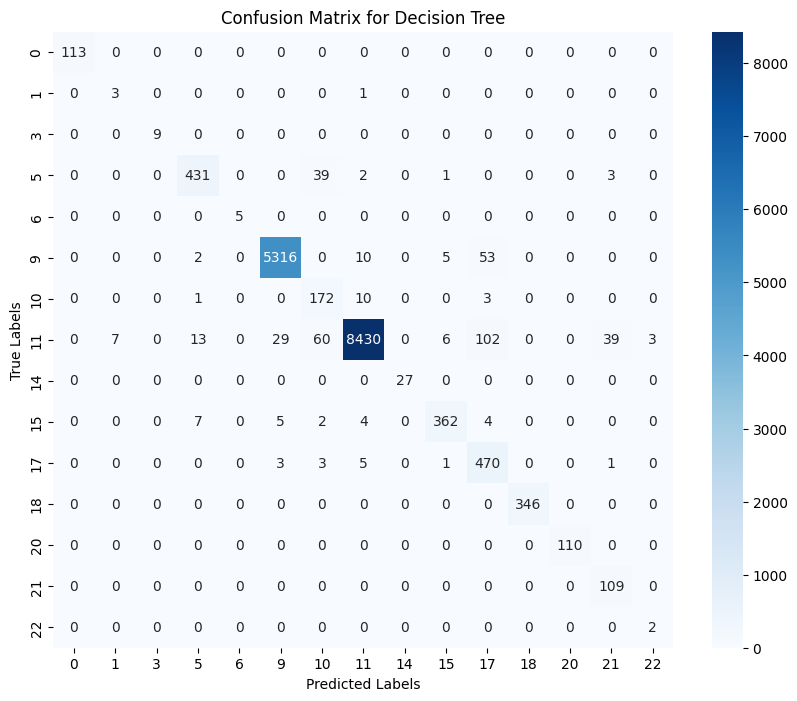

In [16]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_model = DecisionTreeClassifier(max_depth=12, random_state=42)
dt_model.fit(X_train_balanced, y_train_balanced)

# Train and evaluate Decision Tree model
train_and_evaluate(dt_model, X_train_balanced, y_train_balanced, X_test, y_test, "Decision Tree")

With the DecisionTreeClassifier constrained to a max_depth of 12, we achieved an impressive accuracy of 97%. The model shows high precision, recall, and F1-scores for most classes, particularly those with more samples (e.g., classes 9 and 11). However, it struggles with a few minor classes, such as 1 and 22, where recall or precision is lower due to their limited representation. The confusion matrix also reveals that the model confuses some instances, but overall, the depth constraint has helped maintain a balance between accuracy and generalization, reducing overfitting while keeping strong performance across most classes.

##### 2. K-Nearest Neighbors (KNN)

Accuracy for K-Nearest Neighbors (KNN): 0.98

Classification Report for K-Nearest Neighbors (KNN):
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       113
           1       0.05      0.75      0.10         4
           3       0.56      1.00      0.72         9
           5       0.93      0.92      0.93       476
           6       1.00      1.00      1.00         5
           9       1.00      0.99      1.00      5386
          10       0.80      0.90      0.85       186
          11       1.00      0.98      0.99      8689
          14       0.96      1.00      0.98        27
          15       0.92      0.95      0.93       384
          17       0.91      0.99      0.95       483
          18       0.97      0.99      0.98       346
          20       0.98      1.00      0.99       110
          21       0.93      1.00      0.96       109
          22       0.06      1.00      0.12         2

    accuracy                      

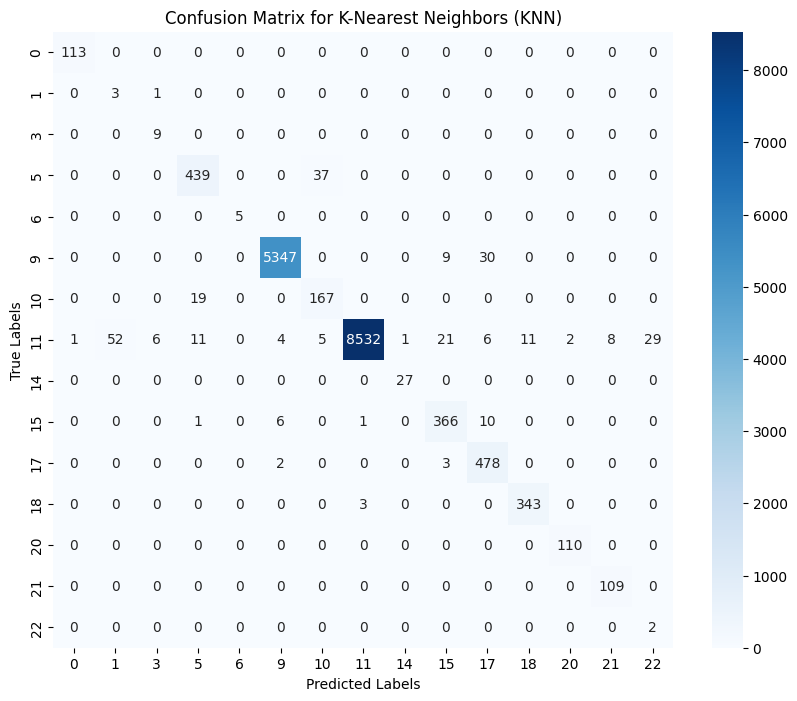

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN with 5 neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model on the balanced training data
knn_model.fit(X_train_balanced, y_train_balanced)

# Evaluate KNN model
train_and_evaluate(knn_model, X_train_balanced, y_train_balanced, X_test, y_test, "K-Nearest Neighbors (KNN)")

##### 3. Neural Network (MLP)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Accuracy for Neural Network: 0.98

Classification Report for Neural Network:
               precision    recall  f1-score   support

           0       0.82      0.99      0.90       113
           1       0.27      1.00      0.42         4
           3       0.90      1.00      0.95         9
           5       0.98      0.94      0.96       476
           6       0.83      1.00      0.91         5
           9       1.00      1.00      1.00      5386
          10       0.93      0.98      0.96       186
          11       0.99      0.97      0.98      8689
          14       0.84      1.00      0.92        27
          15       0.83      0.97      0.89       384
          17       0.97      0.99      0.98       483
          18       1.00      0.98      0.99       346
          20       0.99      1.00      1.00       110
          21       0.59      0.94      0.73       109
          22       0.04      1.00      0.08         2

    accuracy                           0.98     16329
  

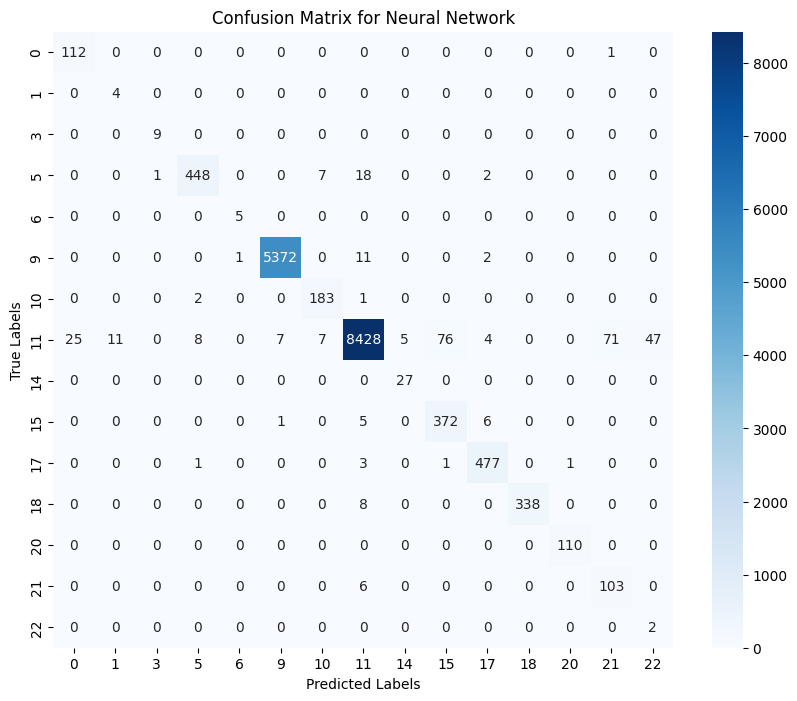

In [18]:
# Import MLPClassifier
from sklearn.neural_network import MLPClassifier

# Initialize the model with 100 neurons in a single hidden layer
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Train and evaluate Neural Network model
train_and_evaluate(mlp_model, X_train_balanced, y_train_balanced, X_test, y_test, "Neural Network")

## 5 - Hyperparameter Tuning:


##### 1. Decision Tree
We’ll tune some important hyperparameters for the Decision Tree:

 * **max_depth: Limits** the depth of the tree to prevent overfitting.
 * **min_samples_split**: The minimum number of samples required to split an internal node.
 * **min_samples_leaf**: The minimum number of samples required to be at a leaf node.

Best parameters for Decision Tree: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best accuracy for Decision Tree: 0.9996355859873223
Accuracy for Optimized Decision Tree: 1.00

Classification Report for Optimized Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         9
           5       0.99      1.00      1.00       476
           6       1.00      1.00      1.00         5
           9       1.00      1.00      1.00      5386
          10       0.99      0.99      0.99       186
          11       1.00      1.00      1.00      8689
          14       1.00      1.00      1.00        27
          15       0.99      0.98      0.99       384
          17       0.99      0.99      0.99       483
          18       1.00      1.00      1.00       346
          20       1.00      1.00      1.00      

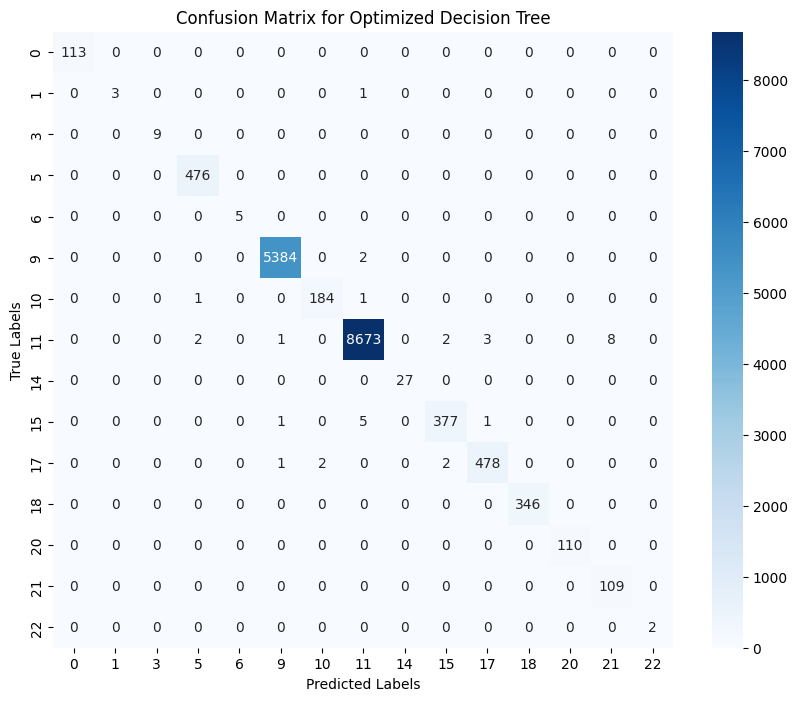

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with Decision Tree model
grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)

# Fit GridSearch to the training data
grid_search_dt.fit(X_train_balanced, y_train_balanced)

# Display the best parameters and best score
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best accuracy for Decision Tree:", grid_search_dt.best_score_)

# Train and evaluate the optimized Decision Tree
best_dt_model = grid_search_dt.best_estimator_
train_and_evaluate(best_dt_model, X_train_balanced, y_train_balanced, X_test, y_test, "Optimized Decision Tree")

The optimized Decision Tree model has achieved exceptionally high performance on the test set, with an overall accuracy of 0.9996355859873223. Here’s a breakdown of the key insights from the classification report:

Best Parameters: The best parameters found through Grid Search were max_depth=25, min_samples_split=5, and min_samples_leaf=1. A deeper tree (with max_depth=25) allowed the model to learn complex patterns, which contributed to the high accuracy.

Even classes with very few samples (e.g., classes 1, 6, and 22) have high scores. For instance, class 1 has a precision of 1.00 but a slightly lower recall of 0.75, likely due to the very limited number of instances in this class.

Classes with only a few instances, like 22, were correctly classified, which suggests the model has successfully learned patterns even in low-sample classes.

##### 2. Neural Network (MLP)
For the Neural Network (MLP) model, we’ll tune:

* hidden_layer_sizes: The number of neurons in each hidden layer.
* alpha: Regularization parameter (prevents overfitting).
* learning_rate_init: The initial learning rate for weight updates.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Best parameters for Neural Network: {'learning_rate_init': 0.001, 'hidden_layer_sizes': (100,), 'alpha': 0.0001}
Best accuracy for Neural Network: 0.9716677694985472
Accuracy for Optimized Neural Network: 0.97

Classification Report for Optimized Neural Network:
               precision    recall  f1-score   support

           0       0.76      0.99      0.86       113
           1       0.12      1.00      0.21         4
           3       0.82      1.00      0.90         9
           5       0.96      0.99      0.97       476
           6       0.62      1.00      0.77         5
           9       1.00      1.00      1.00      5386
          10       0.91      0.98      0.95       186
          11       1.00      0.95      0.97      8689
          14       0.51      1.00      0.68        27
          15       0.82      0.99      0.90       384
          17       0.97      0.98      0.98       483
          18       0.99      0.99      0.99       346
          20       0.99      1.00

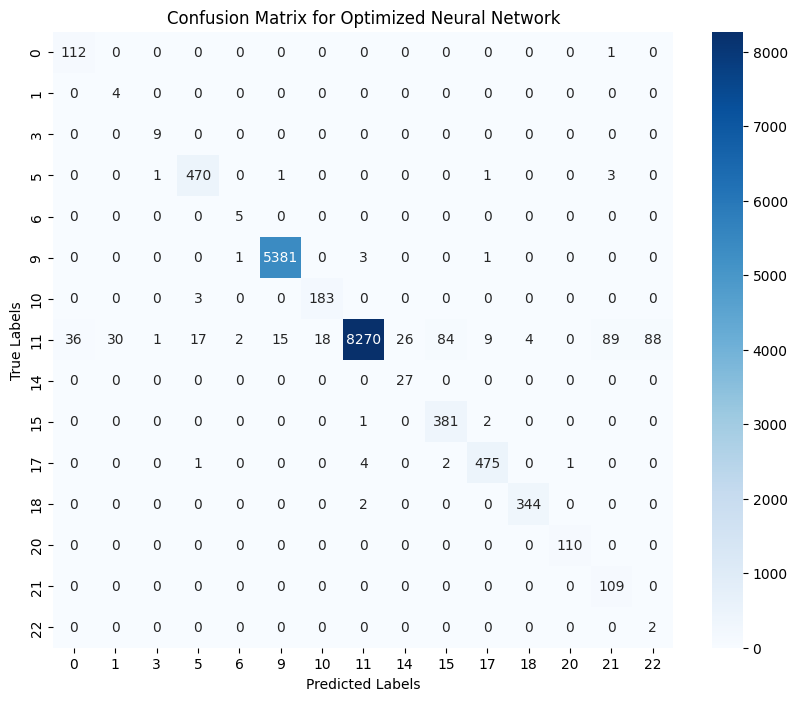

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier

# Define the parameter distribution for Random Search
param_dist_mlp = {
    'hidden_layer_sizes': [(50,), (100,)],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01]
}

# Initialize RandomizedSearchCV with MLP model
random_search_mlp = RandomizedSearchCV(
    estimator=MLPClassifier(max_iter=300, random_state=42),
    param_distributions=param_dist_mlp,
    scoring='accuracy',
    n_iter=5,
    cv=3,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearch to the training data
random_search_mlp.fit(X_train_balanced, y_train_balanced)

# Display the best parameters and best score
print("Best parameters for Neural Network:", random_search_mlp.best_params_)
print("Best accuracy for Neural Network:", random_search_mlp.best_score_)

# Train and evaluate the optimized Neural Network
best_mlp_model = random_search_mlp.best_estimator_
train_and_evaluate(best_mlp_model, X_train_balanced, y_train_balanced, X_test, y_test, "Optimized Neural Network")